# Homework 2

Here we are going to use 3 different csv files to analyse data in different ways.

## Ekbacken 

First we are going to look at apartments in Ekbacken to get their price per square meter, look at the five most expensive apartments according to their ppsqm and then calculate the average ppsqm.

In [1]:
import pandas as pd
url1 = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv"
apartments = pd.read_csv(url1)
apartments.head(10)

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
5,7495000,5923.0,125.0,4.0,2018-06-09 10:51:27,1936.0,Lägenhet,3181135,2018-06-21,8950000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
6,3975000,3324.0,79.2,3.0,2018-06-01 20:39:17,1968.0,Lägenhet,3175733,2018-06-16,4200000,...,59.371047,18.058368,True,Stockholm,Stockholms län,246,Svensk Fastighetsförmedling,713,Broker,http://www.svenskfast.se/
7,3250000,2789.0,64.3,2.0,2018-05-31 20:07:51,1969.0,Lägenhet,3173741,2018-06-15,3300000,...,59.370950,18.058625,True,Stockholm,Stockholms län,264,Innerstadsspecialisten AB,1130,Broker,http://www.innerspec.se/
8,3250000,2965.0,64.3,2.0,2018-05-25 20:46:58,1968.0,Lägenhet,3169052,2018-06-10,3150000,...,59.370950,18.058625,True,Stockholm,Stockholms län,264,Notar,1566,Broker,http://www.notar.se/
9,5495000,6465.0,96.0,3.0,2018-05-19 12:47:47,1936.0,Lägenhet,3154871,2018-06-04,5400000,...,59.371194,18.053552,NaN,Stockholm,Stockholms län,255,Nestor Fastighetsmäkleri,186499846,Broker,https://nestorfastighetsmakleri.se/


This is alot more information than we need so we make a new dataframe out of the columns livingArea and soldPrice since these are the ones we need to calculate the price per squaremeter for each apartment.

In [2]:
relevant_apartments = apartments[["livingArea","soldPrice"]]
relevant_apartments

,livingArea,soldPrice
0,73.0,3820000
1,36.0,2355000
2,81.0,6110000
3,107.0,8050000
4,29.0,2400000
...,...,...
153,26.0,1475000
154,50.0,2245000
155,23.0,1450000
156,56.0,2200000


We add a new column called ppsqm(price per square meter) that divides the selling price over the living area to get the price per square meter.

In [3]:
relevant_apartments["ppsqm"] = apartments["soldPrice"]/apartments["livingArea"]
relevant_apartments

C:\Users\tessy\AppData\Local\Temp\ipykernel_12808\3312545494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_apartments["ppsqm"] = apartments["soldPrice"]/apartments["livingArea"]


,livingArea,soldPrice,ppsqm
0,73.0,3820000,52328.767123
1,36.0,2355000,65416.666667
2,81.0,6110000,75432.098765
3,107.0,8050000,75233.644860
4,29.0,2400000,82758.620690
...,...,...,...
153,26.0,1475000,56730.769231
154,50.0,2245000,44900.000000
155,23.0,1450000,63043.478261
156,56.0,2200000,39285.714286


We sort this dataframe on the price per square meter and look at the five most expensive apartments.

In [4]:
relevant_apartments.sort_values("ppsqm",ascending=False).head()

,livingArea,soldPrice,ppsqm
67,24.0,2500000,104166.666667
50,24.0,2450000,102083.333333
54,23.0,2300000,100000.000000
34,25.0,2210000,88400.000000
55,26.9,2300000,85501.858736


Now we just take the mean of our new column ppsqm,

In [5]:
relevant_apartments["ppsqm"].mean()

58759.382760081746

,and we get our average price per square meter for the apartments in Ekbacken.

Looking back at the data it is intruging that the most expensive apartments for ppsqm are rather small, maybe indicating that you are more paying more for the location than just for the living space.

## The 20018 election

Now we will look at data from the 2018 swedish election to find how many legitimate votes were cast, which muncipality had the highest percentage of people voting for Socaildemokraterna and then rank the three muncipalities with the highest participation. First we read in a dataframe of information about the election.

In [6]:
url2 = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv"
voters = pd.read_csv(url2, delimiter=";")
voters

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,"23,11","6,26","5,66","6,71","26,97","8,01",...,NaN,NaN,NaN,"0,04","0,69","0,06",25830,26036,30740,"84,7"
1,1,15,Stockholms län,Vallentuna,"28,29","10,11","7,73","7,58","18,91","4,47",...,0,NaN,0,"0,02","0,59","0,08",20952,21099,23438,"90,02"
2,1,17,Stockholms län,Österåker,"29,68","9,35","7,48","7,13","19,71","4,97",...,NaN,NaN,"0,01","0,03","0,69","0,13",27711,27947,31309,"89,26"
3,1,20,Stockholms län,Värmdö,"27,49","9,76","6,4","5,89","20,48","6,02",...,NaN,NaN,"0,01","0,04","0,67","0,07",28115,28335,31371,"90,32"
4,1,23,Stockholms län,Järfälla,"23,96","6,31","6,04","6,29","27,68","8,75",...,0,NaN,"0,02","0,04","0,53","0,07",45654,45948,53230,"86,32"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,25,80,Norrbottens län,Luleå,"15,38","7,53","4,37","4,78","38,97","10,47",...,NaN,NaN,"0,01","0,03","0,69","0,04",53182,53589,60185,"89,04"
286,25,81,Norrbottens län,Piteå,"11,82","7,49","2,52","4,8","47,48","10,56",...,NaN,NaN,0,"0,03","0,61","0,02",29523,29719,33094,"89,8"
287,25,82,Norrbottens län,Boden,"14,32","6,23","3,61","4,61","41,76","8,1",...,NaN,NaN,"0,02","0,03","0,84","0,07",19110,19291,21934,"87,95"
288,25,83,Norrbottens län,Haparanda,"12,79","9,61","1,86","5,32","36,69","5,91",...,NaN,NaN,NaN,"0,04","1,01","0,11",4402,4454,6120,"72,78"


First we sum up the column RÖSTERGILTIGA for the legit votes.

In [7]:
voters["RÖSTER GILTIGA"].sum()

6476725

And we get 6 476 725 legitimate votes. 
Next we sort the dataframe by the column S (for Socialdemokraterna) and look at the higest row.

In [8]:
voters.sort_values("S", ascending=False)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
14,1,62,Stockholms län,Danderyd,"41,59","11,28","11,19","10,1","8,04","2,36",...,NaN,NaN,NaN,"0,03","0,24","0,03",21897,21961,23891,"91,92"
188,17,62,Värmlands län,Munkfors,"8,33","8,12","2,91","3,93","52,18","6,11",...,NaN,NaN,NaN,NaN,"1,02",NaN,2340,2364,2777,"85,13"
286,25,81,Norrbottens län,Piteå,"11,82","7,49","2,52","4,8","47,48","10,56",...,NaN,NaN,0,"0,03","0,61","0,02",29523,29719,33094,"89,8"
196,17,83,Värmlands län,Hagfors,"9,27","7,86","2,33","4,51","47,46","8,27",...,NaN,NaN,NaN,NaN,"0,94","0,03",7607,7681,9134,"84,09"
279,25,13,Norrbottens län,Överkalix,"7,81","8,79","2,1","3,44","46,68","10,49",...,NaN,NaN,"0,04",NaN,"1,28",NaN,2241,2270,2667,"85,11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1,87,Stockholms län,Vaxholm,"30,31","13,3","7,76","7,9","16,37","4,7",...,NaN,NaN,"0,01","0,04","0,48","0,06",8106,8153,8791,"92,74"
133,13,84,Hallands län,Kungsbacka,"30,61","9,75","7,59","7,82","16,32","3,7",...,NaN,NaN,"0,01","0,02","0,72","0,04",56049,56490,61538,"91,8"
13,1,60,Stockholms län,Täby,"35,97","10,98","10,71","8,31","13,99","3,2",...,NaN,NaN,"0,01","0,01","0,44","0,04",46386,46616,51157,"91,12"
21,1,86,Stockholms län,Lidingö,"36,02","11,79","10,78","8,59","12,35","3,5",...,NaN,NaN,NaN,"0,01","0,28","0,04",31032,31138,34536,"90,16"


This for some reason puts Danderyd as the first row when Danderyd is the muncipality with the lowest turnout for Socialdemokraterna but since all other rows are sorted correctly we look at the row beneath Danderyd and see that Munkfors had the highest percantage of people voting for Socialdemokratern.

Lastly we look at the three muncipalities with the highest participation.

In [9]:
voters_participation = voters[["LÄNSKOD","KOMMUNKOD","LÄNSNAMN","KOMMUNNAMN","VALDELTAGANDE"]]
voters_participation.sort_values("VALDELTAGANDE",ascending=False).head(3)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,VALDELTAGANDE
103,12,62,Skåne län,Lomma,"93,86"
59,6,43,Jönköpings län,Habo,"93,35"
98,12,33,Skåne län,Vellinge,"93,13"


And those are Lomma, Habo and Vellinge.

## Strokes

Lastly we have a file with data about people including wether they have had a stroke or not.

In [10]:
import matplotlib.pyplot as plt
url3 = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv"
strokes = pd.read_csv(url3)
strokes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<function matplotlib.pyplot.show(close=None, block=None)>

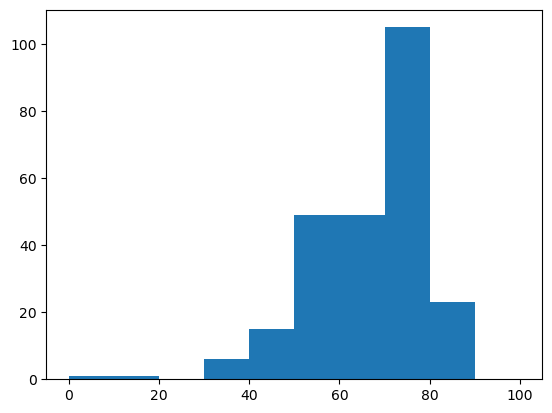

In [11]:
import numpy as np
x = strokes["age"]
y = strokes["stroke"]
z = np.multiply(x,y) #we multiply the ages with if they have had a stroke so everyone who havent had a stroke is set to 0
fig = plt.figure
plt.hist(z, range=(0.01,100)) #we exlude all zeroes since they have not had strokes and the lowest age is 0.08
plt.xlabel = "age"
plt.ylabel = "strokes"
plt.show

From this histogram we can see that while strokes can happen in young ages they ramp up after 50, peaking at 70-80.
From this we can conclude that the risk of stroke increase with age.